In [25]:
%pylab inline

import os
from astropy import *
import math as math
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log', 'mean', 'std', 'pi', 'norm', 'table', 'time', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
#load data
m,s = loadtxt('../data/eqw_imstats.txt', usecols = [2,3], unpack = True)
m_half,s_half = loadtxt('../data/SNR_imstats.txt', usecols = [2,3], unpack = True, comments = '#')
means,stds = loadtxt('../data/helium_imstats.txt', usecols = [2,3],unpack = True, comments = '#')

## below can be used to average the s/n from both sides of the line
m_left = means[0]
m_left_combined = means[1]
m_right = means[2]
m_right_combined = means[3]
s_left = stds[0]
s_left_combined = stds[1]
s_right = stds[2]
s_right_combined = stds[3]
## can also be used to find the s/n before and after imcombine

time  = loadtxt('../data/hjd.txt', usecols = 2, unpack = True)

In [6]:
print(stds)

[0.003783 0.002531 0.004879 0.001415 0.05479  0.05879 ]


In [7]:
#input rv from fxcor

#Vrs
He_rvs = [-8.430,-16.424,-15.150,8.107,15.272,-16.331,-6.830,5.802,18.219,16.272]
He_rvs_unc = [0.877,1.106,0.769,0.541,1.034,1.058,0.734,0.558,1.082,1.228]

#Vr used
O_rvs = [0.400,0.503,0.311,0.280,0.266,0.033,-0.250,-0.392,-0.419,-0.560]
O_rvs_unc = [0.156,0.157,0.098,0.096,0.094,0.080,0.137,0.117,0.205,0.308]

#Vr used
a_rvs = [-0.842,-1.457,-1.426,0.786,1.377,-1.112,-0.771,0.620,1.476,1.230]
a_rvs_unc = [1.059,1.934,1.940,1.019,2.130,1.959,1.199,0.984,2.250,2.017]


print(len(He_rvs),len(He_rvs_unc),len(O_rvs),len(O_rvs_unc),len(a_rvs), len(a_rvs_unc))

10 10 10 10 10 10


In [8]:
#SNR from both sides, averaged

snr_left = m_left/s_left
snr_right = m_right/s_right
snr_av = (snr_left+snr_right)/2

snr_left_combined = m_left_combined/s_left_combined
snr_right_combined = m_right_combined/s_right_combined
snr_av_combined = (snr_left_combined+snr_right_combined)/2

print(snr_av)
print(snr_av_combined)

#this shows that the SNR is way better when using imcombine

235.19234196067163
551.0630723201907


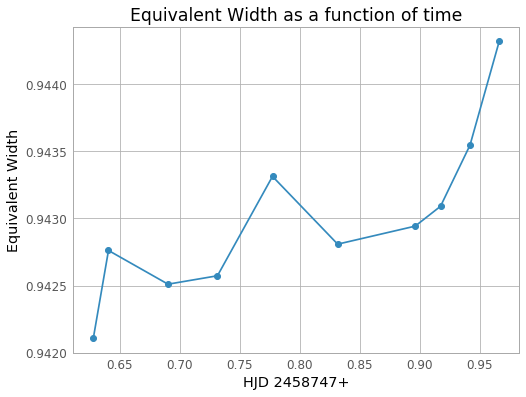

In [9]:
#Equivalent Width as a function of time
eqw = [1-(M*S) for M,S in zip(m,s)]
t = time-2458747
figure()
plot(t,eqw,'o-')
xlabel('HJD 2458747+')
ylabel('Equivalent Width')
title('Equivalent Width as a function of time')
show()

Residual 0.000 km/s
Period = 0.183854 days
Amplitude = 0.00 km/s
Phase = 0.1798 days
Zero Point = 0.94 km/s


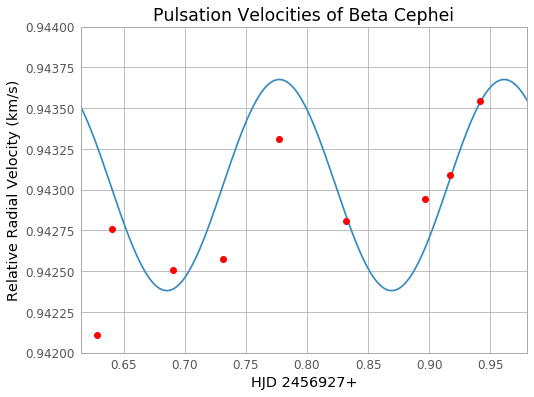

[0.00021812 0.05490764 0.0025677  0.00016278]


In [10]:
#try a sine fit to EQW

pi=3.14159265358979323846264
ydata=np.array(eqw[1:])
xdata=np.array(time[1:])-2458747
def orbit(x,p1,p2,p3,p4): return p1*np.sin((x-p2)/p3)+p4
popt, pcov = curve_fit(orbit, xdata, ydata, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata - orbit(xdata,p1,p2,p3,p4)
n=15
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.6, 0.98, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4

figure()
plot(xx,c)
plot(t,eqw,'ro')
xlabel('HJD 2456927+')
ylabel('Relative Radial Velocity (km/s)')
title('Pulsation Velocities of Beta Cephei')
per=np.multiply(2*pi,p3)
print("Residual", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
print("Zero Point =", '%.2f' % p4, "km/s")
#text(0.65, 15, r'Period=0.19 days')
axis([0.615, 0.98, 0.942, 0.944])
grid(True)
plt.show()

#sine fit error
sine_error = np.sqrt(np.diagonal(pcov))
print(sine_error)

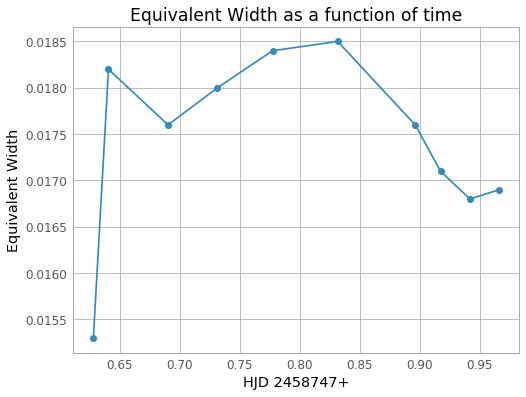

In [11]:
#Equivalent Width as a function of time
eqw = [1-(M) for M,S in zip(m,s)]
t = time-2458747
figure()
plot(t,eqw,'o-')
xlabel('HJD 2458747+')
ylabel('Equivalent Width')
title('Equivalent Width as a function of time')
show()

Residual 0.000 km/s
Period = 0.243035 days
Amplitude = 0.00 km/s
Phase = 0.0288 days
Zero Point = 0.02 km/s


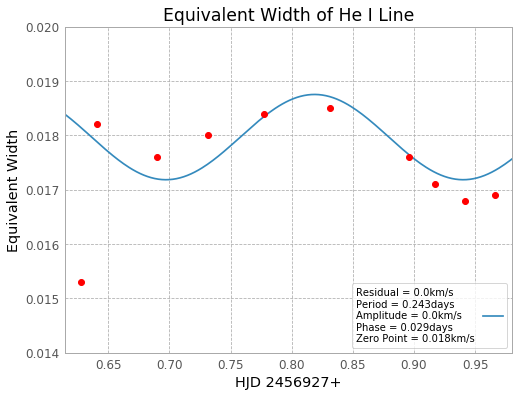

[0.00023017 0.07516837 0.00376915 0.0001723 ]


In [12]:
#try a sine fit to EQW

pi=3.14159265358979323846264
ydata=np.array(eqw[1:])
xdata=np.array(time[1:])-2458747
def orbit(x,p1,p2,p3,p4): return p1*np.sin((x-p2)/p3)+p4
popt, pcov = curve_fit(orbit, xdata, ydata, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata - orbit(xdata,p1,p2,p3,p4)
n=15
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.6, 0.98, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4

figure()

xlabel('HJD 2456927+')
ylabel('Equivalent Width')
title('Equivalent Width of He I Line')
per=np.multiply(2*pi,p3)
print("Residual", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
print("Zero Point =", '%.2f' % p4, "km/s")

plot(xx,c,label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres,3),round(per,3),round(p1,2),\
                                              round(p2,3),round(p4,3)))
plot(t,eqw,'ro')

#text(0.65, 15, r'Period=0.19 days')
axis([0.615, 0.98, 0.014, 0.02])
grid(linestyle = '--')
legend(loc = 4,fontsize = 10,markerfirst = False,framealpha = 0.8)
savefig('eqw.png')
plt.show()

#sine fit error
sine_error = np.sqrt(np.diagonal(pcov))
print(sine_error)

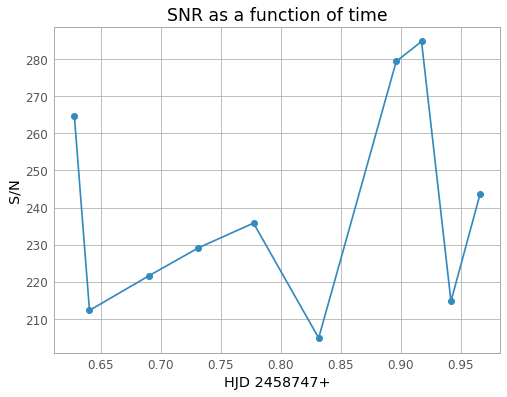

In [13]:
#SNR as a function of time
SNR = [M/S for M,S in zip(m_half,s_half)]
t = time-2458747
figure()
plot(t,SNR,'o-')
xlabel('HJD 2458747+')
ylabel('S/N')
title('SNR as a function of time')
show()

Residual 19.211 km/s
Period = 0.333835 days
Amplitude = -19.56 km/s
Phase = -0.3509 days
Zero Point = 236.17 km/s


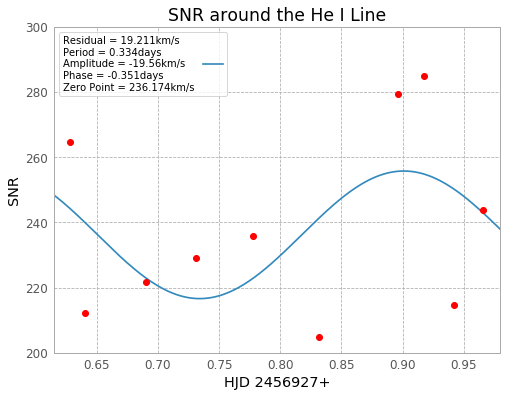

[14.87832198  0.32092934  0.01499265 10.5899687 ]


In [14]:
#try a sine fit to SNR

pi=3.14159265358979323846264
ydata=np.array(SNR)
xdata=np.array(time)-2458747
def orbit(x,p1,p2,p3,p4): return p1*np.sin((x-p2)/p3)+p4
popt, pcov = curve_fit(orbit, xdata, ydata, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata - orbit(xdata,p1,p2,p3,p4)
n=15
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.6, 0.98, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4

figure()

#errorbar(xdata,ydata,yerr = He_rvs_unc,fmt ='r.',capsize = 5)
xlabel('HJD 2456927+')
ylabel('SNR')
title('SNR around the He I Line')
per=np.multiply(2*pi,p3)
print("Residual", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
print("Zero Point =", '%.2f' % p4, "km/s")

plot(xx,c,label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres,3),round(per,3),round(p1,2),\
                                              round(p2,3),round(p4,3)))
plot(t,SNR,'ro')

axis([0.615, 0.98, 200, 300])
grid(linestyle = '--')
legend(loc = 2,fontsize = 10,markerfirst = False,framealpha = 0.8)
savefig('snr.png')
plt.show()

#sine fit error
sine_error = np.sqrt(np.diagonal(pcov))
print(sine_error)

Residual 0.561 km/s
Period = 0.190807 days
Amplitude = 20.28 km/s
Phase = 0.1408 days
Zero Point = -2.06 km/s


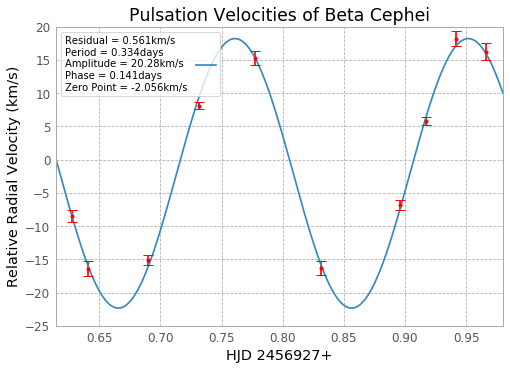

[4.37599546e-01 3.41815781e-03 1.59113668e-04 3.06879366e-01]


In [15]:
pi=3.14159265358979323846264
ydata=np.array(He_rvs)
xdata=np.array(time)-2458747
def orbit(x,p1,p2,p3,p4): return p1*np.sin((x-p2)/p3)+p4
popt, pcov = curve_fit(orbit, xdata, ydata, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata - orbit(xdata,p1,p2,p3,p4)
n=15
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.6, 0.98, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4

figure(figsize = (8,5.5))
plot(xx,c,label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres,3),round(per,3),round(p1,2),\
                                              round(p2,3),round(p4,3)))
errorbar(xdata,ydata,yerr = He_rvs_unc,fmt ='r.',capsize = 5)
xlabel('HJD 2456927+')
ylabel('Relative Radial Velocity (km/s)')
title('Pulsation Velocities of Beta Cephei')
per=np.multiply(2*pi,p3)
print("Residual", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
print("Zero Point =", '%.2f' % p4, "km/s")

axis([0.615, 0.98, -25, 20])
grid(linestyle = '--')
legend(loc = 2,fontsize = 10,markerfirst = False,framealpha = 0.8)
savefig('He_rv.png')
show()

#sine fit error
sine_error = np.sqrt(np.diagonal(pcov))
print(sine_error)
#0.00099

Residual 0.684 km/s
Period = 0.190777 days
Amplitude = 20.57 km/s
Phase = 0.1407 days
Zero Point = -2.11 km/s


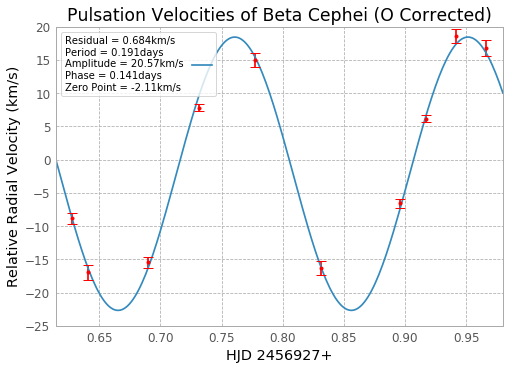

[5.33181043e-01 4.11060578e-03 1.91206364e-04 3.73618424e-01]


In [16]:
# correct using oxygen line

O_corr_rvs = [H-O for H,O in zip(He_rvs,O_rvs)]
O_corr_rvs_unc = [sqrt(H_u**2+O_u**2) for H_u,O_u in zip(He_rvs_unc,O_rvs_unc)]

####
pi=3.14159265358979323846264
ydata=np.array(O_corr_rvs)
xdata=np.array(time)-2458747
def orbit(x,p1,p2,p3,p4): return p1*np.sin((x-p2)/p3)+p4
popt, pcov = curve_fit(orbit, xdata, ydata, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata - orbit(xdata,p1,p2,p3,p4)
n=15
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.6, 0.98, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4

figure(figsize = (8,5.5))


xlabel('HJD 2456927+')
ylabel('Relative Radial Velocity (km/s)')
title('Pulsation Velocities of Beta Cephei (O Corrected)')

per=np.multiply(2*pi,p3)
print("Residual", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
print("Zero Point =", '%.2f' % p4, "km/s")
#text(0.63, 16.5, r'Period=0.1908 days')

plot(xx,c,label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres,3),round(per,3),round(p1,2),\
                                              round(p2,3),round(p4,3)))
errorbar(xdata,ydata,yerr = He_rvs_unc,fmt ='r.',capsize = 5)

axis([0.615, 0.98, -25, 20])
grid(linestyle = '--')
legend(fontsize = 10,markerfirst = False,framealpha = 0.8)
savefig('O_corr_rv.png')
plt.show()

#sine fit error
sine_error_ocorr = np.sqrt(np.diagonal(pcov))
print(sine_error_ocorr)
#0.0012014

In [17]:
sine_error_ocorr-sine_error

#oxygen correction increased the amount of error in all 4 parameters

array([9.55814965e-02, 6.92447970e-04, 3.20926957e-05, 6.67390573e-02])

Residual 0.091 km/s
Period = 0.191874 days
Amplitude = -1.73 km/s
Phase = 0.2336 days
Zero Point = -0.18 km/s


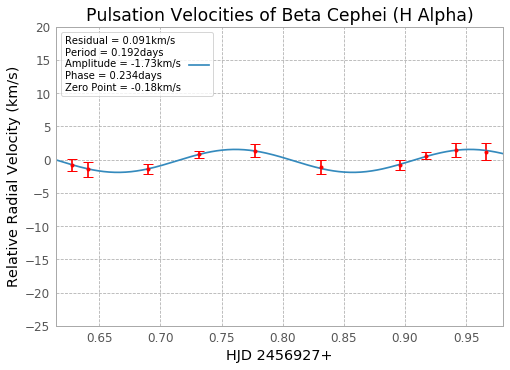

[0.07067039 0.0056703  0.00030875 0.04990052]


In [23]:
pi=3.14159265358979323846264
ydata=np.array(a_rvs)
xdata=np.array(time)-2458747
def orbit(x,p1,p2,p3,p4): return p1*np.sin((x-p2)/p3)+p4
popt, pcov = curve_fit(orbit, xdata, ydata, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata - orbit(xdata,p1,p2,p3,p4)
n=15
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.6, 0.98, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4

figure(figsize = (8,5.5))
plot(xx,c,label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres,3),round(per,3),round(p1,2),\
                                              round(p2,3),round(p4,3)))
errorbar(xdata,ydata,yerr = He_rvs_unc,fmt ='r.',capsize = 5)
xlabel('HJD 2456927+')
ylabel('Relative Radial Velocity (km/s)')
title('Pulsation Velocities of Beta Cephei (H Alpha)')
per=np.multiply(2*pi,p3)
print("Residual", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
print("Zero Point =", '%.2f' % p4, "km/s")
#text(0.65, 15, r'Period=0.19 days')
axis([0.615, 0.98, -25, 20])
grid(linestyle = '--')
legend(loc = 2,fontsize = 10,markerfirst = False,framealpha = 0.8)
savefig('halpha.png')
plt.show()

#sine fit error
sine_error_ha = np.sqrt(np.diagonal(pcov))
print(sine_error_ha)

In [21]:
#Halpha mistake was made. Did not isolate only the centre of the Halpha line 
    #--> Halpha line has water vapor lines in it that do not move

25387.2196011665
1997.9979979979983


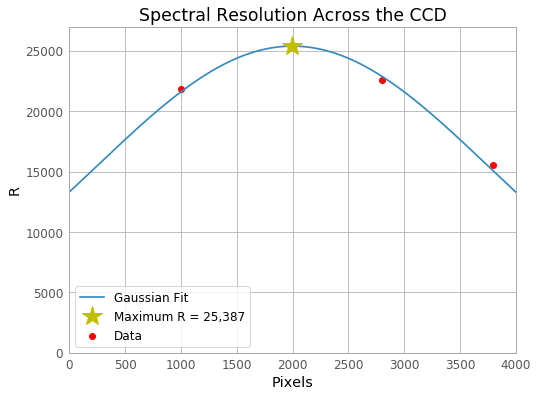

In [24]:
#R calculations -- edge effects
from scipy.stats import norm

pix = [999.5,2800,3800]
R = [21815,22558,15565]


mean,std=norm.fit(R)
x = np.linspace(0, 4000, 1000)
y = norm.pdf(x, mean, std)
y = norm.pdf(x, 2000, 1760)
y*=112000000

print(max(y))
print(x[list(y).index(max(y))])

figure()
scatter(pix,R,color='red', label = "Data")
plot(x, y,label = 'Gaussian Fit')
plot(x[list(y).index(max(y))],max(y),'y*', markersize = 20, label = 'Maximum R = 25,387')
ylabel('R')
xlabel('Pixels')
xlim(0,4000)
ylim(0,27000)
title('Spectral Resolution Across the CCD')
legend(fancybox = True)
savefig('R.png')
show()